

# Joining Data with Pandas – Filtering Joins (Semi Join & Anti Join)

---

## 1. Introduction to Filtering Joins

* **Filtering joins**: A join that **filters** rows in one table based on matches in another table.
* Pandas **does not** have a direct `.semi_join()` or `.anti_join()` method like some SQL dialects or R's `dplyr`.
* But we can **replicate** these joins using:

  * `.merge()` (with specific `how` parameters)
  * `.isin()` for filtering
  * `indicator=True` for identifying matches or non-matches

---

## 2. Mutating Joins vs. Filtering Joins

* **Mutating joins**:

  * Combine data from two tables.
  * Return columns from both tables.
* **Filtering joins**:

  * Keep only rows from the left table that match (or don’t match) rows in the right table.
  * Return **only columns from the left table**.

---

## 3. Semi Join

### Definition

* Returns **only rows** from the left table **that have a match** in the right table.
* Like an **inner join** but:

  * Keeps **only left table columns**.
  * Removes duplicates from the left table.

---

### Example Dataset

* `genres`: music genres (with `gid` as genre ID)
* `top_tracks`: top-rated song tracks (also with `gid`)

---

### **Step 1 – Merge tables (inner join)**

```python
genres_tracks = genres.merge(top_tracks, on='gid')
print(genres_tracks.head())
```

**Explanation:**

* `merge(top_tracks, on='gid')`: matches rows where `gid` exists in both tables.
* Defaults to `how='inner'` (only matched rows are returned).

**Output:**

```
   gid   name_x                  tid   name_y           aid   mtid     composer        u_price
0    1   Rock                    2260  Don't Stop M...  185.0   1.0   Mercury, Fre...   0.99
1    1   Rock                    2933  Mysterious Ways  232.0   1.0   U2               0.99
2    1   Rock                    2618  Speed Of Light   212.0   1.0   Billy Duffy/...  0.99
3    1   Rock                    2998  When Love Co...  237.0   1.0   Bono/Clayton...  0.99
4    3   Metal                   1234  ...               ...     ...       ...          ...
```

**Meaning:**

* Each row here is a combination of genre data + matching top track info.

---

### **Step 2 – Identify matches with `.isin()`**

```python
genres['gid'].isin(genres_tracks['gid'])
```

**Explanation:**

* Checks **for each `gid` in `genres`** if it exists in `genres_tracks['gid']`.
* Returns a Boolean Series.

**Output:**

```
0     True
1     True
2     True
3     True
4    False
Name: gid, dtype: bool
```

**Meaning:**

* `True` → genre has at least one top track.
* `False` → genre does not appear in top tracks.

---

### **Step 3 – Filter genres table**

```python
top_genres = genres[genres['gid'].isin(genres_tracks['gid'])]
print(top_genres.head())
```

**Explanation:**

* `genres[...]`: subsetting rows.
* `isin(...)`: condition keeps only genres with matching top tracks.

**Output:**

```
   gid                name
0    1                Rock
1    2                Jazz
2    3                Metal
3    4  Alternative & Punk
4    6                Blues
```

**Meaning:**

* Only genres that appear in top tracks.
* **This is our semi join result**.

---

## 4. Anti Join

### Definition

* Returns **rows from the left table that have NO match** in the right table.
* Only returns columns from the left table.

---

### **Step 1 – Left join with indicator**

```python
genres_tracks = genres.merge(top_tracks, on='gid', how='left', indicator=True)
print(genres_tracks.head())
```

**Explanation:**

* `how='left'`: keep **all rows from genres**.
* `indicator=True`: adds `_merge` column telling source of match:

  * `'both'`: found in both tables
  * `'left_only'`: only in left table
  * `'right_only'`: only in right table (not possible here since left join)

**Output:**

```
   gid         name_x     tid        name_y     aid   mtid     composer     u_price    _merge
0    1          Rock     2260  Don't Stop M...  185.0  1.0   Mercury, Fre...   0.99    both
1    1          Rock     2933  Mysterious Ways  232.0  1.0   U2               0.99    both
2    1          Rock     2618  Speed Of Light   212.0  1.0   Billy Duffy/...  0.99    both
3    1          Rock     2998  When Love Co...  237.0  1.0   Bono/Clayton...  0.99    both
4    5  Rock And Roll     NaN           NaN     NaN   NaN           NaN       NaN    left_only
```

---

### **Step 2 – Get GIDs with no match**

```python
gid_list = genres_tracks.loc[genres_tracks['_merge'] == 'left_only', 'gid']
print(gid_list.head())
```

**Explanation:**

* `.loc[condition, 'gid']`: filters rows where `_merge` is `'left_only'`.
* Returns list of `gid`s that **do not** have a match in top tracks.

**Output:**

```
23     5
34     9
36    11
37    12
38    13
Name: gid, dtype: int64
```

---

### **Step 3 – Filter genres to get non-top genres**

```python
non_top_genres = genres[genres['gid'].isin(gid_list)]
print(non_top_genres.head())
```

**Explanation:**

* Filters `genres` where `gid` is in the list of unmatched IDs.

**Output:**

```
   gid             name
0    5   Rock And Roll
1    9             Pop
2   11      Bossa Nova
3   12  Easy Listening
4   13     Heavy Metal
```

**Meaning:**

* Genres not represented in the `top_tracks` table.

---

## 5. Summary Table

| Technique | Method                              | Includes Final? | Filters By           |
| --------- | ----------------------------------- | --------------- | -------------------- |
| Semi join | `.isin()` with merged IDs           | ✅ Yes           | Matches in right     |
| Anti join | `merge(..., how='left', indicator)` | ✅ Yes           | Non-matches in right |

---

## 6. Key Takeaways

* **Semi join** → filter to keep matches.
* **Anti join** → filter to keep non-matches.
* Use `.isin()` for filtering after merging.
* Use `indicator=True` to identify match status.

---



### Exercise
Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The top_cust and employees tables have been provided for you.
```python
Instructions 1/3
35 XP
1. Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.

# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

Instructions 2/3
35 XP
2. Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.

# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']


Instructions 3/3
30 XP
3. Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.

# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])


<script.py> output:
       srid     lname    fname            title  hire_date                    email
    0     1     Adams   Andrew  General Manager 2002-08-14   andrew@chinookcorp.com
    1     2   Edwards    Nancy    Sales Manager 2002-05-01    nancy@chinookcorp.com
    5     6  Mitchell  Michael       IT Manager 2003-10-17  michael@chinookcorp.com
    6     7      King   Robert         IT Staff 2004-01-02   robert@chinookcorp.com
    7     8  Callahan    Laura         IT Staff 2004-03-04    laura@chinookcorp.com
    
```

### Exercise
Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.

The tables non_mus_tcks, top_invoices, and genres have been loaded for you.

Instructions
100 XP
Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.
Use .isin() to subset the rows of non_mus_tcks where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
Merge cnt_by_gid with the genres table on gid and print the result.
```python
# Merge the non_mus_tcks and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid': 'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on ='gid'))

<script.py> output:
       gid  tid      name
    0   19    4  TV Shows
    1   21    2     Drama
    2   22    1    Comedy
```


# **Joining Data with Pandas – Concatenation**

## **1. Introduction to Vertical Concatenation**

In Pandas, concatenation is used to combine multiple DataFrames either **vertically** (stacking rows) or **horizontally** (adding columns).  
Here, we focus on **vertical concatenation** — growing data *downward*.

- **Merge vs Concatenate**:  
  - **Merge** → Grows data horizontally (adds columns, based on keys).  
  - **Concatenate** → Grows data vertically (adds rows).  
- We use **`pd.concat()`** for concatenation.

---

## **2. Example Data – Three Monthly Invoice Tables**

We have three DataFrames with **identical column names**, each containing data for a different month.

```python
# January data
inv_jan
````

| iid | cid | invoice\_date | total |
| --: | --: | ------------- | ----: |
|   1 |   2 | 2009-01-01    |  1.98 |
|   2 |   4 | 2009-01-02    |  3.96 |
|   3 |   8 | 2009-01-03    |  5.94 |

```python
# February data
inv_feb
```

| iid | cid | invoice\_date | total |
| --: | --: | ------------- | ----: |
|   7 |  38 | 2009-02-01    |  1.98 |
|   8 |  40 | 2009-02-01    |  1.98 |
|   9 |  42 | 2009-02-02    |  3.96 |

```python
# March data
inv_mar
```

| iid | cid | invoice\_date | total |
| --: | --: | ------------- | ----: |
|  14 |  17 | 2009-03-04    |  1.98 |
|  15 |  19 | 2009-03-04    |  1.98 |
|  16 |  21 | 2009-03-05    |  3.96 |

---

## **3. Basic Concatenation**

We can combine the three monthly tables **vertically** with `pd.concat()`.

```python
pd.concat([inv_jan, inv_feb, inv_mar])
```

**Output:**

|    | iid | cid | invoice\_date | total |
| -: | --: | --: | ------------- | ----: |
|  0 |   1 |   2 | 2009-01-01    |  1.98 |
|  1 |   2 |   4 | 2009-01-02    |  3.96 |
|  2 |   3 |   8 | 2009-01-03    |  5.94 |
|  0 |   7 |  38 | 2009-02-01    |  1.98 |
|  1 |   8 |  40 | 2009-02-01    |  1.98 |
|  2 |   9 |  42 | 2009-02-02    |  3.96 |
|  0 |  14 |  17 | 2009-03-04    |  1.98 |
|  1 |  15 |  19 | 2009-03-04    |  1.98 |
|  2 |  16 |  21 | 2009-03-05    |  3.96 |

**Explanation (line-by-line)**:

* `pd.concat(...)` → Combines objects along a given axis (rows here).
* `[inv_jan, inv_feb, inv_mar]` → List of DataFrames to concatenate.
* **Default `axis=0`** → Stack DataFrames vertically.
* Index values from original tables are preserved (duplicate index numbers possible).

---

## **4. Ignoring the Index**

We can reindex the combined DataFrame so that the index runs from `0` to `n-1`.

```python
pd.concat([inv_jan, inv_feb, inv_mar], ignore_index=True)
```

**Output:**

|    | iid | cid | invoice\_date | total |
| -: | --: | --: | ------------- | ----: |
|  0 |   1 |   2 | 2009-01-01    |  1.98 |
|  1 |   2 |   4 | 2009-01-02    |  3.96 |
|  2 |   3 |   8 | 2009-01-03    |  5.94 |
|  3 |   7 |  38 | 2009-02-01    |  1.98 |
|  4 |   8 |  40 | 2009-02-01    |  1.98 |
|  5 |   9 |  42 | 2009-02-02    |  3.96 |
|  6 |  14 |  17 | 2009-03-04    |  1.98 |
|  7 |  15 |  19 | 2009-03-04    |  1.98 |
|  8 |  16 |  21 | 2009-03-05    |  3.96 |

**Explanation**:

* `ignore_index=True` → Discards original indexes and creates a new continuous index.
* Useful when old indexes don’t carry important meaning.

---

## **5. Setting Labels for Original Tables**

We can create a **MultiIndex** to track which table each row came from.

```python
pd.concat(
    [inv_jan, inv_feb, inv_mar],
    ignore_index=False,
    keys=['jan', 'feb', 'mar']
)
```

**Output:**

|     |   | iid | cid | invoice\_date | total |
| --- | - | --: | --: | ------------- | ----: |
| jan | 0 |   1 |   2 | 2009-01-01    |  1.98 |
| jan | 1 |   2 |   4 | 2009-01-02    |  3.96 |
| jan | 2 |   3 |   8 | 2009-01-03    |  5.94 |
| feb | 0 |   7 |  38 | 2009-02-01    |  1.98 |
| feb | 1 |   8 |  40 | 2009-02-01    |  1.98 |
| feb | 2 |   9 |  42 | 2009-02-02    |  3.96 |
| mar | 0 |  14 |  17 | 2009-03-04    |  1.98 |
| mar | 1 |  15 |  19 | 2009-03-04    |  1.98 |
| mar | 2 |  16 |  21 | 2009-03-05    |  3.96 |

**Explanation**:

* `keys=['jan','feb','mar']` → Labels for each table in the concat.
* Creates a MultiIndex: first level = month label, second = original row index.
* Useful for tracking the source of each row after concatenation.

---

## **6. Concatenating with Different Column Names**

Sometimes the tables don’t have identical columns.
Example: `inv_feb` has an **extra column** `bill_ctry`.

```python
pd.concat([inv_jan, inv_feb], sort=True)
```

**Output:**

| bill\_ctry | cid | iid | invoice\_date | total |
| ---------- | --: | --: | ------------- | ----: |
| NaN        |   2 |   1 | 2009-01-01    |  1.98 |
| NaN        |   4 |   2 | 2009-01-02    |  3.96 |
| NaN        |   8 |   3 | 2009-01-03    |  5.94 |
| Germany    |  38 |   7 | 2009-02-01    |  1.98 |
| France     |  40 |   8 | 2009-02-01    |  1.98 |
| France     |  42 |   9 | 2009-02-02    |  3.96 |

**Explanation**:

* `sort=True` → Columns are sorted alphabetically in the result.
* Missing columns are filled with `NaN`.
* Default `join='outer'` includes **all columns** from all tables.

---

## **7. Keeping Only Matching Columns**

We can include **only the common columns** between tables.

```python
pd.concat([inv_jan, inv_feb], join='inner')
```

**Output:**

| iid | cid | invoice\_date | total |
| --: | --: | ------------- | ----: |
|   1 |   2 | 2009-01-01    |  1.98 |
|   2 |   4 | 2009-01-02    |  3.96 |
|   3 |   8 | 2009-01-03    |  5.94 |
|   7 |  38 | 2009-02-01    |  1.98 |
|   8 |  40 | 2009-02-01    |  1.98 |
|   9 |  42 | 2009-02-02    |  3.96 |

**Explanation**:

* `join='inner'` → Keeps only columns **present in all tables**.
* The column `bill_ctry` is dropped because it’s missing in `inv_jan`.
* `sort` parameter is ignored in this mode.

---

## **8. Summary Table – `pd.concat()` Options**

| Parameter           | Purpose                                  | Example                               |
| ------------------- | ---------------------------------------- | ------------------------------------- |
| `axis=0` (default)  | Stack DataFrames vertically              | `pd.concat([df1, df2])`               |
| `ignore_index=True` | Reset index in result                    | `pd.concat([...], ignore_index=True)` |
| `keys=[]`           | Create MultiIndex with labels            | `pd.concat([...], keys=['A','B'])`    |
| `sort=True`         | Sort columns in output                   | `pd.concat([...], sort=True)`         |
| `join='outer'`      | Keep all columns (fill missing with NaN) | Default behavior                      |
| `join='inner'`      | Keep only common columns                 | `pd.concat([...], join='inner')`      |

---

**Tip for Remembering:**

* **Outer join** = *Include everything* → Missing = `NaN`
* **Inner join** = *Only what’s shared*
* `ignore_index=True` → Fresh start for index
* `keys=` → Add a label to remember origin
* `sort=True` → Alphabet soup for your columns 🍜

```





### Exercise
Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.

The tables tracks_master, tracks_ride, and tracks_st have loaded for you.

1. Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.

```python
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)


<script.py> output:
       aid             composer  gid  mtid                     name   tid  u_price
    0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
    1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
    4  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
    0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
    1  154                  NaN    3     1       Ride The Lightning  1875     0.99
    2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
    3  154                  NaN    3     1            Fade To Black  1877     0.99
    4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
    0  155                  NaN    3     1                  Frantic  1882     0.99
    1  155                  NaN    3     1                St. Anger  1883     0.99
    2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
    3  155                  NaN    3     1             Dirty Window  1885     0.99
    4  155                  NaN    3     1            Invisible Kid  1886     0.99
In [1]:

    
2. Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st]
                               ,ignore_index=True,
                               sort=True)
print(tracks_from_albums)

<script.py> output:
        aid             composer  gid  mtid                     name   tid  u_price
    0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
    1   152            K.Hammett    3     1        Master Of Puppets  1854     0.99
    2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
    3   154                  NaN    3     1     Fight Fire With Fire  1874     0.99
    4   154                  NaN    3     1       Ride The Lightning  1875     0.99
    5   154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
    6   154                  NaN    3     1            Fade To Black  1877     0.99
    7   154                  NaN    3     1        Trapped Under Ice  1878     0.99
    8   155                  NaN    3     1                  Frantic  1882     0.99
    9   155                  NaN    3     1                St. Anger  1883     0.99
    10  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
    11  155                  NaN    3     1             Dirty Window  1885     0.99
    12  155                  NaN    3     1            Invisible Kid  1886     0.99
In [1]:

    

3. Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.

# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

<script.py> output:
       aid  gid  mtid                     name   tid  u_price
    0  152    3     1                  Battery  1853     0.99
    1  152    3     1        Master Of Puppets  1854     0.99
    4  152    3     1        Disposable Heroes  1857     0.99
    0  154    3     1     Fight Fire With Fire  1874     0.99
    1  154    3     1       Ride The Lightning  1875     0.99
    2  154    3     1  For Whom The Bell Tolls  1876     0.99
    3  154    3     1            Fade To Black  1877     0.99
    4  154    3     1        Trapped Under Ice  1878     0.99
    0  155    3     1                  Frantic  1882     0.99
    1  155    3     1                St. Anger  1883     0.99
    2  155    3     1     Some Kind Of Monster  1884     0.99
    3  155    3     1             Dirty Window  1885     0.99
    4  155    3     1            Invisible Kid  1886     0.99
In [1]:


### Exercise
Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.


Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to inv_jul_thr_sep.

Use the .agg() method to find the average of the total column from the grouped invoices.

Create a bar chart of avg_inv_by_month.
```python
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul', '8Aug', '9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()
```
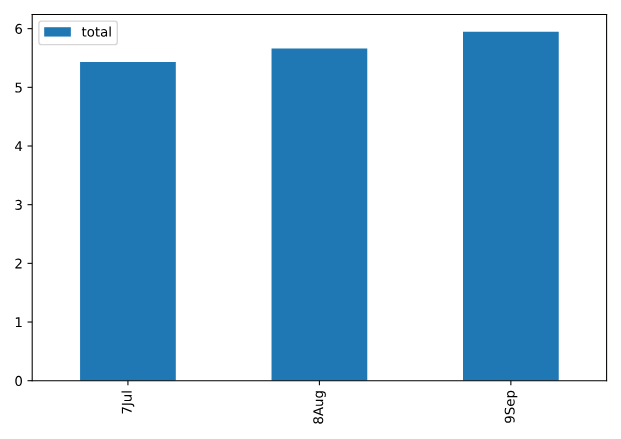

# Verifying Integrity When Joining & Concatenating Data (pandas)

---

## 1) Verifying integrity — why it matters

* **Goal:** Ensure your merges/concats match the structure you expect, so you don’t silently introduce errors (e.g., duplicated rows, inflated counts, skewed means).
* **Two common integrity checks:**

  * `DataFrame.merge(..., validate=...)` for **merges**.
  * `pd.concat([...], verify_integrity=...)` for **concatenations**.

---

## 2) Let’s check our data (possible issues)

* **Merging pitfalls**

  * *Unintentional one-to-many:* you expected one row per key on both sides, but one side actually has duplicates.
  * *Unintentional many-to-many:* both sides have duplicates for the merge keys.
* **Concatenating pitfalls**

  * *Duplicate records*: appending tables that share some of the same rows or indexes.

---

## 3) Validating merges with `validate=`

`DataFrame.merge(validate=None)` lets you assert the **relationship type** between the left and right keys. If reality doesn’t match your expectation, pandas raises a **MergeError**.

* Allowed values for `validate`:

  * `'one_to_one'`
  * `'one_to_many'` (or `'1:m'`)
  * `'many_to_one'` (or `'m:1'`)
  * `'many_to_many'` (or `'m:m'`)

---

## 4) Merge datasets for example

We’ll use two tables keyed by `tid`:

**`tracks` (left)**

```
tid  name                 aid  mtid  gid  u_price
2    Balls to the...      2    2     1    0.99
3    Fast As a Shark      3    2     1    0.99
4    Restless and...      3    2     1    0.99
```

**`specs` (right)**

```
tid  milliseconds  bytes
2    342562        5510424
3    230619        3990994
2    252051        4331779   <-- duplicate tid (2)
```

> **Observation:** `specs` has **two** rows with `tid == 2`, so a `tid`-based merge is **not** one-to-one.

---

## 5) Merge validate: **one\_to\_one** (expecting an error)

### Code

```python
tracks.merge(specs, on='tid', validate='one_to_one')
```

### Output (expected)

```
Traceback (most recent call last):
MergeError: Merge keys are not unique in right dataset; not a one-to-one merge
```

### Line-by-line explanation

* `tracks.merge(specs, on='tid', validate='one_to_one')`

  * **What it does:** Merges `tracks` (left) with `specs` (right) on column `tid`.
  * **Why:** We assert the relationship **should** be one-to-one (each `tid` appears once in each table).
  * **Result/meaning:** pandas inspects the keys and finds `tid=2` duplicated in `specs`. That violates `one_to_one`, so it raises a **MergeError** instead of silently producing a one-to-many merge.

### Why this output matters

* The error **protects data quality** by forcing you to handle duplicates (e.g., deduplicate `specs` or choose a different key) before merging.

---

## 6) Merge validate: **one\_to\_many** (a valid pattern)

Here we merge **albums** (left) to **tracks** (right) on `aid`. One album has **multiple** tracks → **one-to-many** is expected.

### Code

```python
albums.merge(tracks, on='aid', validate='one_to_many')
```

### Output (expected)

```
aid  title               artid  tid  name                 mtid  gid  u_price
2    Balls to the...     2      2    Balls to the...      2     1    0.99
3    Restless and...     2      3    Fast As a Shark      2     1    0.99
3    Restless and...     2      4    Restless and...      2     1    0.99
```

### Line-by-line explanation

* `albums.merge(tracks, on='aid', validate='one_to_many')`

  * **What it does:** Merges `albums` with `tracks` using album id `aid`.
  * **Why:** We expect each album to have **one or more** tracks (one-to-many).
  * **Result/meaning:** No error: the relationship matches the expectation. The merged rows repeat album info for each matching track.

### Why this output matters

* The absence of an error **confirms** the relationship type you expected (one album → many tracks), preventing subtle duplication mistakes.

---

## 7) Verifying concatenations with `verify_integrity`

`pd.concat([...], verify_integrity=False)` concatenates DataFrames without checking for duplicate **index values**.

* Set `verify_integrity=True` to **raise an error** if concatenating would produce **duplicate index labels**.
* Note: This check is **only on the index**, not on the full row contents.

---

## 8) Datasets for `concat` example (index = invoice id)

**`inv_feb`** (index name: `iid`)

```
iid  cid  invoice_date  total
7    38   2009-02-01    1.98
8    40   2009-02-01    1.98
9    42   2009-02-02    3.96
```

**`inv_mar`** (index name: `iid`)

```
iid  cid  invoice_date  total
9    17   2009-03-04    1.98   <-- duplicate index (9)
15   19   2009-03-04    1.98
16   21   2009-03-05    3.96
```

> **Observation:** The index label `9` appears in **both** tables.

---

## 9) Verifying concatenation: example

### A) With `verify_integrity=True` (expecting an error)

#### Code

```python
pd.concat([inv_feb, inv_mar], verify_integrity=True)
```

#### Output (expected)

```
Traceback (most recent call last):
ValueError: Indexes have overlapping values: Int64Index([9], dtype='int64', name='iid')
```

#### Line-by-line explanation

* `pd.concat([inv_feb, inv_mar], verify_integrity=True)`

  * **What it does:** Stacks `inv_feb` over `inv_mar` vertically.
  * **Why:** We’re telling pandas to **check** that the resulting index has **no duplicates**.
  * **Result/meaning:** Because `iid=9` exists in both, pandas **raises a ValueError** to alert you.

#### Significance

* Prevents silent duplication of indexes, which could cause **overcounting** or misleading joins later if the index is a key.

---

### B) With `verify_integrity=False` (default) — duplicates allowed

#### Code

```python
pd.concat([inv_feb, inv_mar], verify_integrity=False)
```

#### Output (expected)

```
      cid  invoice_date  total
iid
7      38   2009-02-01    1.98
8      40   2009-02-01    1.98
9      42   2009-02-02    3.96
9      17   2009-03-04    1.98
15     19   2009-03-04    1.98
16     21   2009-03-05    3.96
```

#### Line-by-line explanation

* `pd.concat([inv_feb, inv_mar], verify_integrity=False)`

  * **What it does:** Same concatenation, but **do not** check for duplicate index values.
  * **Why:** Sometimes you accept duplicates (e.g., you’ll reset or reindex later).
  * **Result/meaning:** The result includes **both** rows with `iid=9`, creating **overlapping** index labels.

#### Significance

* This is **allowed** behavior, but you must be aware that duplicate index labels exist. Consider:

  * `reset_index(drop=False)` to turn indexes into a column, then dedupe.
  * Ensure downstream operations won’t misinterpret duplicated indexes.

---

## 10) Why verify integrity & what to do when checks fail

* **Why verify?**

  * Real-world data is messy; unexpected duplicates (in keys or indexes) can:

    * Inflate aggregations (means, sums).
    * Produce incorrect plots or KPIs.
    * Break assumptions in later joins/concats.
* **What to do if you get errors:**

  * **Fix incorrect data** upstream (clean duplicates, correct keys).
  * **Drop duplicate rows** or **deduplicate keys** in the problematic table(s).
  * **Make relationships explicit** (e.g., confirm if the data is truly one-to-many).
  * **Reindex or reset index** before concatenation/merging where appropriate.

---

## Appendix — Code Recap (with inline purpose)

> Use these as quick references; each one mirrors the examples above.

### A) Validate one-to-one (raises on duplicate keys)

```python
# Expect: MergeError if either side has duplicate 'tid'
tracks.merge(specs, on='tid', validate='one_to_one')
```

### B) Validate one-to-many (album → tracks)

```python
# Expect: no error; each album has multiple tracks
albums.merge(tracks, on='aid', validate='one_to_many')
```

### C) Concat with integrity check (raises on duplicate index)

```python
# Expect: ValueError if inv_feb and inv_mar share any index labels (e.g., 9)
pd.concat([inv_feb, inv_mar], verify_integrity=True)
```

### D) Concat allowing duplicate index (default)

```python
# Result includes duplicate index labels; handle downstream as needed
pd.concat([inv_feb, inv_mar], verify_integrity=False)
```

---

### Key Takeaways

* **Always assert relationships** in merges when you know what to expect (`validate=`).
* **Guard against duplicate indexes** in concatenations (`verify_integrity=`).
* **Treat raised errors as gifts**—they catch issues early, before they corrupt your analysis.


### Exercise
Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables classic_18, classic_19, and pop_18, pop_19 have been loaded for you. Additionally, pandas has been loaded as pd.

Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19.
Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19.

```python
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)



With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join.
Use .isin() to filter classic_18_19 where tid is in classic_pop.


# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19,on='tid', how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)


<script.py> output:
        pid   tid
    3    12  3479
    10   12  3439
    21   12  3445
    23   12  3449
    48   12  3437
    50   12  3435
```